<a href="https://colab.research.google.com/github/dharm1k987/tensorflow_projects/blob/master/tensorflow_breast_cancer_classification/Breast%20Cancer%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Download the Data

In [2]:
!echo Downloading...
!curl \
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data" \
    -O && echo Done downloading || echo Error occurred

Downloading...
Done downloading 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  121k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  121k  100  121k    0     0   121k      0  0:00:01 --:--:--  0:00:01  146k


In [3]:
!ls

Breast Cancer Classification.ipynb
wdbc.data


# View Data

In [4]:
# data doesn't come with columns, so we add our own
columns = ['id', 'label'] + [f"f{i}" for i in range(30)]

data = pd.read_csv('./wdbc.data', names=columns)
data.head()

,id,label,f0,f1,f2,f3,f4,f5,f6,f7,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# drop the ID column
data = data.drop('id', axis=1)

# the label column is our y
y = data['label']
# drop the label column
data = data.drop('label', axis=1)

data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# change y column to have M = 0 and B = 1
y = list(map(lambda x: 1 if x == 'M' else 0, y))
y = np.array(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# Graph Data

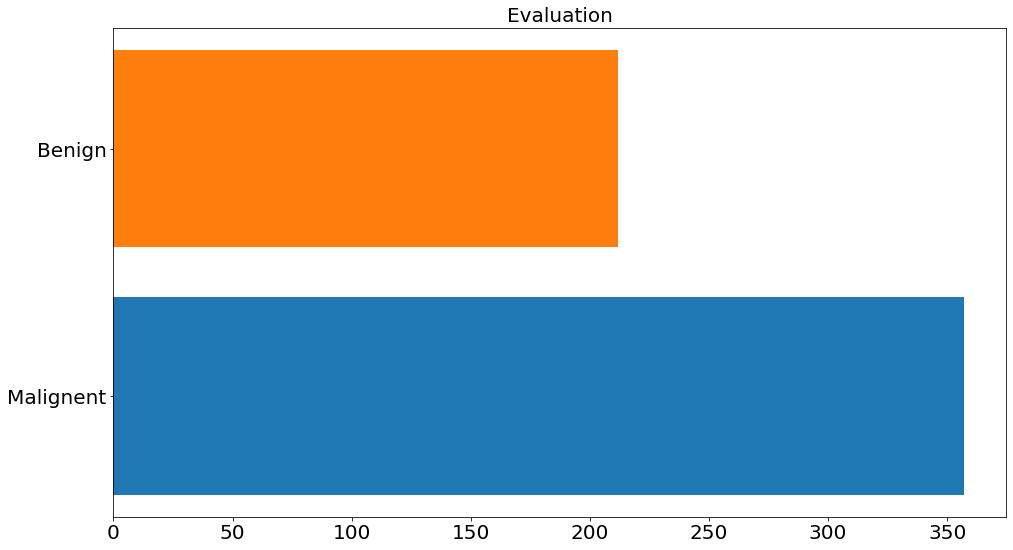

In [15]:
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(16,9))
plt.barh('Malignent', dict(zip(unique, counts))[0])
plt.barh('Benign', dict(zip(unique, counts))[1])
plt.title('Evaluation', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Scale Data

In [7]:
# scale input data, this automatically puts it in a numpy array
data = preprocessing.scale(data)
print(data)
print(data.shape)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
(569, 30)


# Split the Data

In [8]:
# split into our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print('X_train: {}'.format(len(X_train)))
print('X_test: {}'.format(len(X_test)))

X_train: 455
X_test: 114


# Create the Model

In [9]:
from keras.optimizers import Adam

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(data.shape[1])),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

Using TensorFlow backend.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.4527
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.7121
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8462
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8879
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.9121
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9165
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9231
Epoch 8/200
15/15 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.9275
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9319
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9407
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9912
Epoch 84/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9890
Epoch 85/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9912
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9912
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9912
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9912
Epoch 89/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9912
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9912
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9912
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9912
Epoch 93/200


# Test Model

In [12]:
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

4/4 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 1.0000
Test loss:  0.012983392924070358
Test accuracy:  1.0
